In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [7]:
from datetime import datetime
from datetime import date

In [59]:
stop_words = stopwords.words('english')
keywords = ['http','avlliv','avfc','villa','liverpool','avl','aston','lfc','rt','goal','co'] # Removing the words that were in the search parameters

def soupclean(text):
    cleaned = []
    p_stemmer = PorterStemmer()
    for t in text:
        # Using BeautifulSoup to remove HTLM features
        textblock = BeautifulSoup(t).get_text()

        # Removing numerical values
        textblock = re.sub('[^a-zA-Z]'," ",textblock)

        # Set the block to lower case
        textblock = textblock.lower()

        # Splitting the text by strings
        wordblock = textblock.split()

        # Remove stopwords from the wordblock
        wordblock = [w for w in wordblock if w not in stop_words]

        # Stemmping the text using Porter Stemmer
        wordblock = [p_stemmer.stem(i) for i in wordblock]

        # Removing any additional keywords
        wordblock = [w for w in wordblock if w not in keywords]

        # Recreate the textblock
        textblock = (" ".join(wordblock))
        cleaned.append(textblock)
    
    print(len(text),'posts were cleaned.')
    return cleaned

In [60]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)


# Wordclouds and visualisation

In [61]:
tweetdf=pd.read_csv('../datasets/tweetstreamresults.csv')

In [71]:
tweetdf

,date,user,is_retweet,is_quote,text,quoted_text
0,4/10/2020 18:10,justincroser,False,False,COME ON REDS!! 🔴🔴 Have to sleep for work but h...,NaN
1,4/10/2020 18:10,LFCYNWA125,True,False,RT @LFC: Jürgen Klopp provides detail on the s...,NaN
2,4/10/2020 18:10,itstugenfinest,True,False,RT @SkySportsPL: 'I'm pretty sure he won't be ...,NaN
3,4/10/2020 18:10,guu_mendees,True,False,RT @ludovicofans: Now follow the news L...,NaN
4,4/10/2020 18:10,justindivine5,True,True,RT @AnfieldWatch: Jurgen Klopp: “It’s an inter...,Liverpool face an anxious wait on how long the...
...,...,...,...,...,...,...
309660,4/10/2020 20:20,IamTytanium,True,True,RT @kennagq: Don't let a minor ole disastercla...,Lol you better laff belleful Do you think Li...
309661,4/10/2020 20:20,jonesy73,False,False,Gutted that we couldn’t all be there together ...,NaN
309662,4/10/2020 20:20,ryanYNWA,True,False,RT @ElliotHackney: Everyone: Last season was b...,NaN
309663,4/10/2020 20:20,ChizyFootball,False,False,@quentin_gsp On est ensemble c'est magnifique ...,NaN


In [62]:
tweettext=soupclean(tweetdf['text'])

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/eU0T9V1MaZ.lade.Peter.Kjær.kommentere.på.Liverpool." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/FOzR4z6FoC" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/nezosvraQn" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ZgxX7Ap1k4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/s2IArcL1M5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ntHdUCzb1R" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/8mJGU465dh" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/O0ZT59S5c1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/10pENotptw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/OWcvlpRZ1F" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/nBJTCMGs33" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/NI5NmqDjMq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Jw12h7JfZM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/LIDtNct7Wy" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ywTyCZdjAz" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ye4hg6iq0T" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/hMdsOuwqW8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/HQX903yNV8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/psyYzyoVME" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/WCFaz5qMsN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/LA94Qr894Y" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/B11eWd0YU7" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/if3o5SfLH3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/zSDLQSXJVD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/XkVdNOXqfe" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/SlvYpHPEGJ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/PnNlrKNqiQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/mVk7FITe2C" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/JXqgqcDB22" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/S0MbAGrb6m" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/9bZTwKlsJF" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/IHkdjGf8zh" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/DuUgJModye" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/aXERMH0PNJ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/XMSOPEQJQd" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/KFKImvUjHQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/BOf809C7uq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Lr9O0a1jE2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/iP6Z1JqjDO" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/rrbB3CcZY2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/eI91wdcU9v" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/clHgRw9ANt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/L3XlL1Ipum" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/QdYTWJW0ww" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ryz6gP9Mqa" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/S2oDz5nLGJ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/P09mXCHcrG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/nxzkIrsZrT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/4UQ9iOLZnP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/pj3rYtnck2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/LxSZt87CRx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Io1imRmOi4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/37fK2eI7Js" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/31XA07qbjw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/xMtHKmZOpj" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/EbuudNzpdN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/qqNmmFM9tT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ZGQRODzQIr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/L7fWdzRxJn" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/bJfWz9SVBj" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/yEqDjD1VXz" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/1DOA2Dvxbk" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/WTf92QuYXd" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/R25PNTfBaq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/0RMuNIS7ZI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/BiANYi3WDz" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/l52sHAXUnb" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/DqRMKRhnwg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/IXzCj66V0S" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/CDieOcBabi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/4SUYt3KKcs" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/OVIlrHps1N" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/999UqESNTu" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ITOXVkfhxA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/d39OzIrdVD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/X5H0l4yvcO" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/3DyMJkdRZH" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/LmiqhPJpsC" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/bsDbn7mgfx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/LlLTVL9p1Z" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/OuzPPLHOcQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/dNiYeimFFE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/BC0fg39NOp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/DOQy5tVOQS" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ZnNNel9TJe" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/9DWH3w5KG0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Dtk7ypNz8O" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/3U2e28f9go" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:333: MarkupResemblesLocatorWarning: "........" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/4pd7ez1HvE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: Mar

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/R6oVmKi8MK" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/YwXQR34oUr" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/bYvQ5uSzwL" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/xbzf7Snq2F" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/01LhtW4BLD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/NliAmAoOM4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/oAZL2Jnx5D" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/1dZsYAaEJS" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/hpkuOD1Z0K" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/F8EgAhbyfc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/zrxuOTF9TK" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Cb5MDIZ6Rz" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/CtplLtMNuw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Vgpn4x514a" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/IEbbIZUT6A" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/vcbWB6mwLg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/QOzEiPP57U" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/jxhFt6uO77" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/w5bLayiaPp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/c5V5awWhZZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/MQYYI6UrL0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/xAkD41XUr7" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/xZzpCdKemB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ubeFGYP2yt" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/1c132nmQRI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/MNZ2GABTUn" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/V4qqr2dSty" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Pmw410RJuy" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/KOu8wrLNnB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/JHdk4YSqeq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/JsOrzuklVL" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/hQV17sHmE7" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/aKEtpWq7X4" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/x8e0q8H9ED" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/6B3EPBBGxM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/HMtzfoWFMT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/NqiV5ibLHZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/e4lbc3Rg9C" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/FR3s4BBFTZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/zNzPCbcfwD" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/8dXLUbZd6r" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/ozvvucMBn6" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/yIfBOikxon" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/lnnL0GVR2C" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Oe1XRtXo0w" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/vTvh1AQnov" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/HHBMXMafBA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/Drjct1Tcy5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/0b7N2iXqVs" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/YSIs9CfVdZ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/DIcBciKawN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

309665 posts were cleaned.


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/nAO60Bd8LP" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/OwNUZHiT3N" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://t.co/k0FTavdqpV" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupRese

In [63]:
tweetvector=vectorizer.fit_transform(tweettext)

In [64]:
tweetvocab = vectorizer.get_feature_names()
tweet_common_words = pd.DataFrame(tweetvector.toarray(), columns = vocab).sum().sort_values(ascending = False)

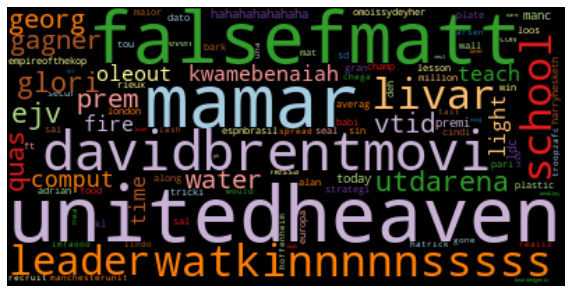

In [65]:
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="black",
                      colormap='Paired')
wordcloud.generate_from_frequencies(frequencies=tweet_common_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
tweet_common_words

unitedheaven       26711
mamar              24706
falsefmatt         23978
davidbrentmovi     18187
watkinnnnnsssss    15440
                   ...  
nya                   36
buat                  36
women                 36
kepa                  36
fell                  36
Length: 5000, dtype: int64

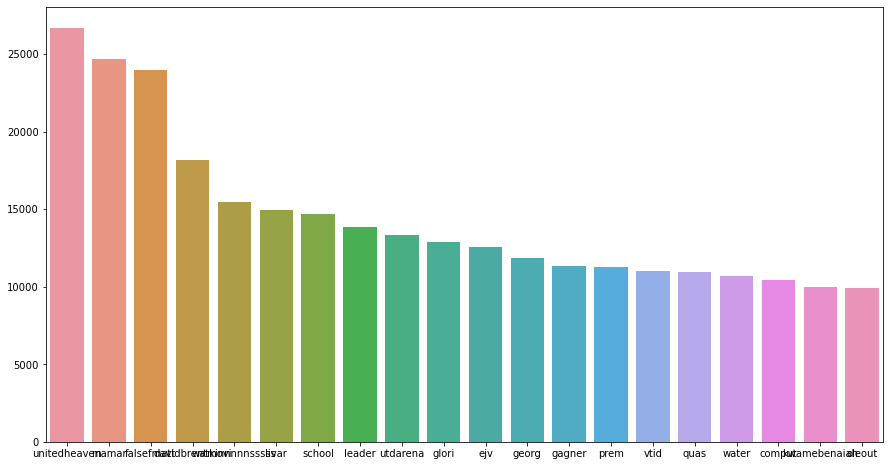

In [70]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x=tweet_common_words[:20].index,y=tweet_common_words[:20])
#ax.axes.xaxis.set_ticks([])
plt.show()

In [37]:
rlfc_matchthread=pd.read_csv('../datasets/rlfc_avllfc_matchthread.csv')
rsoccer_matchthread=pd.read_csv('../datasets/rsoccer_avllfc_matchthread.csv')

In [40]:
rlfc_matchthread

,author,body,score,created_utc,distinguished,is_submitter,created_time
0,vadapaav,Reply to this comment with gifs and time stamp...,1,1.601833e+09,moderator,False,2020-10-05T01:37:01
1,UnderpantsGnomezz,I think I understand why the Hendo - Gini - Mi...,71,1.601842e+09,NaN,False,2020-10-05T04:09:18
2,YouCanCallMeAroae,what a fucking through ball to nobody by Bobby,63,1.601838e+09,NaN,False,2020-10-05T03:04:45
3,Sixty_fivee,Fucks sake I hope Alisson is back for the Ever...,59,1.601833e+09,NaN,False,2020-10-05T01:42:19
4,danielja149,Can milner play goalie?,50,1.601836e+09,NaN,False,2020-10-05T02:24:17
...,...,...,...,...,...,...,...
8082,RagingWookies,"Even Keita, why?\n\nDo you remember what peopl...",1,1.601842e+09,NaN,False,2020-10-05T04:00:13
8083,cominternv,I do! But I saw the draw of Gini. His style is...,1,1.601842e+09,NaN,False,2020-10-05T04:03:56
8084,RagingWookies,Watch some of Keita from his time with RB. Tha...,1,1.601842e+09,NaN,False,2020-10-05T04:05:40
8085,cominternv,Judging players based on YouTube videos has be...,1,1.601842e+09,NaN,False,2020-10-05T04:07:21


In [68]:
rlfc_matchthread['body']=rlfc_matchthread['body'].astype(str)

In [69]:
lfctext=soupclean(rlfc_matchthread['body'])
lfcvector=vectorizer.fit_transform(lfctext)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:333: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


8087 posts were cleaned.


# Data Processing And Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['selftext'],
                                                    df['subreddit'],
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = df['subreddit'])

In [ ]:
X_train_features = vectorizer.fit_transform(X_train_text)
X_test_features = vectorizer.transform(X_test_text)

In [ ]:
vocab = vectorizer.get_feature_names()